In [1]:
import os
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import json
from classes import learn_class as lc
from importlib import reload
from classes import experiments as exp
import seaborn as sns
import random
sns.set_theme()
np.random.seed(0)
random.seed(0)
code_dir = r'C:\\Users\\theod\\PycharmProjects\\climate_policy_thesis\\climate_policy_RL'
proj_dir = r'C:\\Users\\theod\\Desktop\\UCL\\Machine Learning\\Project'

os.getcwd()

'C:\\Users\\theod\\PycharmProjects\\climate_policy_thesis\\climate_policy_RL'

# Agent plots

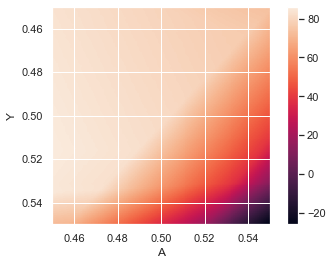

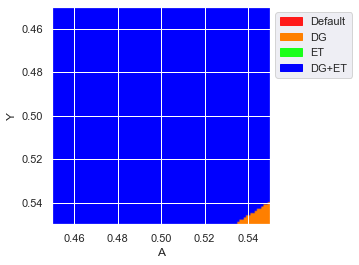

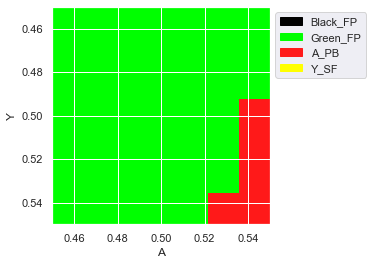

In [4]:
dqn = lc.Learn()
dqn.set_agent("DQN", pt_file_path=os.path.join(proj_dir, "models","default", "dqn_target_net_0.pt"))
dqn.initialisation_values(10000)
plt.show()
dqn.initialisation_actions(10000)
plt.show()
dqn.test_agent(49)
# plt.savefig(os.path.join(proj_dir, "overleaf images", "dqn features.png"), dpi=100, bbox_inches="tight")

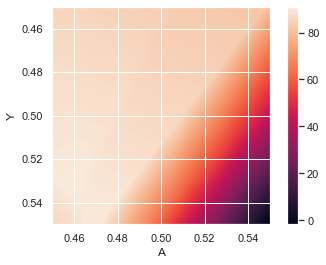

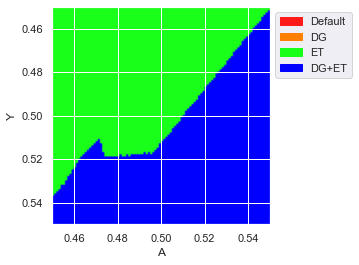

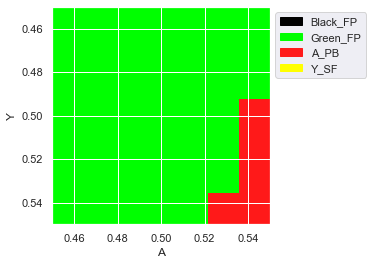

In [7]:
ddqn = lc.Learn()
ddqn.set_agent("DuelDDQN", pt_file_path=os.path.join(proj_dir, "models","default", "duelddqn_target_net_0.pt"))
ddqn.initialisation_values(10000)
plt.show()
ddqn.initialisation_actions(10000)
plt.show()
ddqn.test_agent(49)

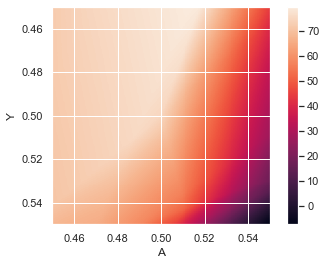

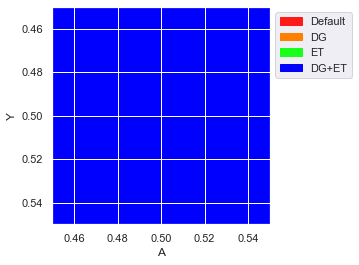

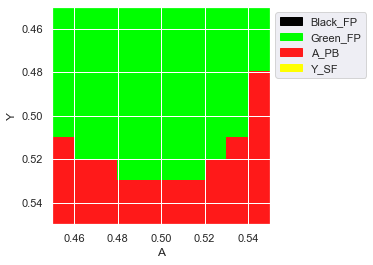

In [12]:
ppo = lc.Learn()
ppo.set_agent("PPO", os.path.join(proj_dir, "models","default", "ppo_policy_net_0.pt"), os.path.join(proj_dir, "models","default", "ppo_critic_net_1.pt"))
ppo.initialisation_values(10000)
plt.show()
ppo.initialisation_actions(10000)
plt.show()
ppo.test_agent(100)

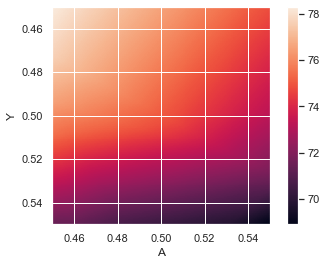

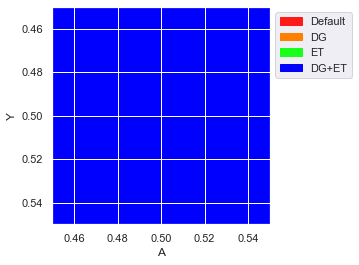

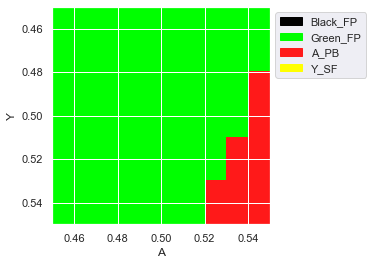

In [10]:
a2c = lc.Learn()
a2c.set_agent("A2C", os.path.join(proj_dir, "models","default", "a2c_actor_0.pt"), os.path.join(proj_dir, "models","default", "a2c_critic_1.pt"))
a2c.initialisation_values(10000)
plt.show()
a2c.initialisation_actions(10000)
plt.show()
a2c.test_agent(100)

# hyperparameter importance

In [44]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor
import time
import numpy as np
sweep_dir = os.path.join(proj_dir, "sweeps")

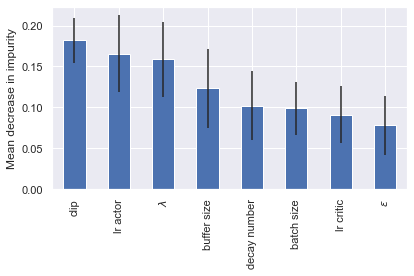

In [58]:
ppo = os.path.join(sweep_dir, "PPO sweep 2.csv")
dfppo = pd.read_csv(ppo)

X = dfppo[["epsilon", "buffer_size", "batch_size", "clip", "lamda", "lr_actor", "lr_critic", "decay_number"]]
y = dfppo["mean_reward"]
data = dfppo[["epsilon", "buffer_size", "batch_size", "clip", "lamda", "lr_actor", "lr_critic", "decay_number", "mean_reward"]]
feature_names = ["$\epsilon$", "buffer size", "batch size", "clip", "$\lambda$", "lr actor", "lr critic", "decay number"]
forest = ExtraTreesRegressor(n_estimators=100,
                             random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
#ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep ppo2.png"), bbox_inches="tight", dpi=300)

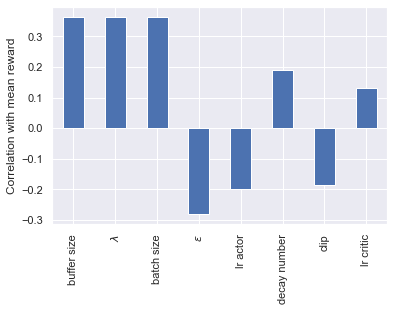

In [59]:
fig, ax = plt.subplots()
corrs = data.corr().mean_reward
corrs.index = feature_names + ["mean reward"]
corrs = corrs.sort_values(axis=0, ascending=False, key=lambda x: abs(x))[1:]
corrs.plot.bar(ax=ax)
ax.set_ylabel("Correlation with mean reward")
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep ppo corr2.png"), bbox_inches="tight", dpi=300)

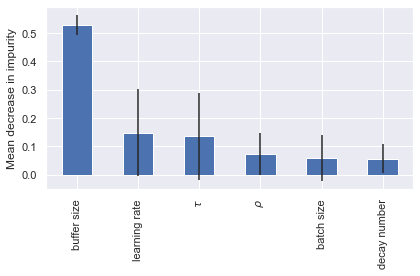

In [60]:
dqn = os.path.join(sweep_dir, "DQN sweep 2.csv")
dqndf = pd.read_csv(dqn)
dqndf = dqndf[["batch_size","buffer_size", "lr", "rho", "tau", "decay_number","mean_reward"]].dropna(axis=0)

X = dqndf[["batch_size", "buffer_size", "lr", "rho", "tau","decay_number" ]]
y = dqndf["mean_reward"]
feature_names = ["batch size","buffer size", "learning rate", r"$\rho$", r"$\tau$", "decay number"]
forest = ExtraTreesRegressor(n_estimators=100, random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
#ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep dqn3.png"), bbox_inches="tight", dpi=300)

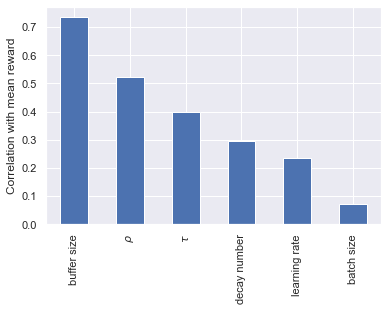

In [61]:
fig, ax = plt.subplots()
corrs = dqndf.corr().mean_reward
corrs.index = feature_names + ["mean rewards"]
corrs = corrs.sort_values(axis=0, ascending=False, key=lambda x: abs(x))[1:]
corrs.plot.bar(ax=ax)
ax.set_ylabel("Correlation with mean reward")
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep dqn corr3.png"), bbox_inches="tight", dpi=300)

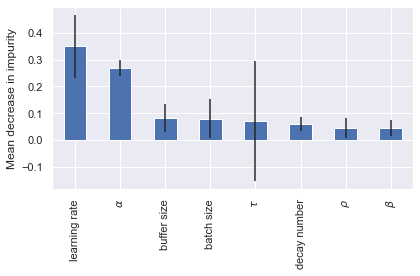

In [62]:
ddqn = os.path.join(sweep_dir, "DuelDDQN sweep 2.csv")
ddqndf = pd.read_csv(ddqn)
ddqndf = ddqndf[["alpha","beta","batch_size","buffer_size", "lr", "rho", "tau" ,"decay_number", "mean_reward"]].dropna(axis=0)

X = ddqndf[["alpha","beta","batch_size","buffer_size", "lr", "rho", "tau", "decay_number"]]
y = ddqndf["mean_reward"]
feature_names = [r"$\alpha$",r"$\beta$","batch size","buffer size", "learning rate", r"$\rho$", r"$\tau$", "decay number" ]
forest = ExtraTreesRegressor(n_estimators=100, random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
#ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep ddqn2.png"), bbox_inches="tight", dpi=300)

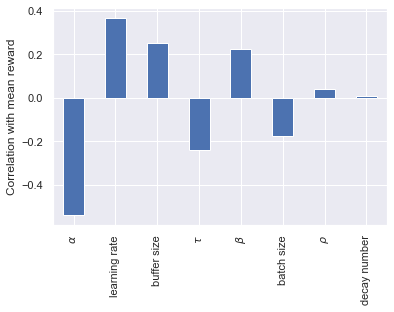

In [63]:
fig, ax = plt.subplots()
corrs = ddqndf.corr().mean_reward
corrs.index = feature_names + ["mean rewards"]
corrs = corrs.sort_values(axis=0, ascending=False, key=lambda x: abs(x))[1:]
corrs.plot.bar(ax=ax)
ax.set_ylabel("Correlation with mean reward")
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep ddqn corr2.png"), bbox_inches="tight", dpi=300)

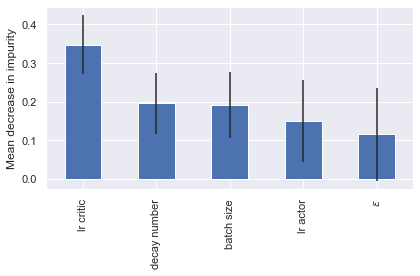

In [64]:
a2c = os.path.join(sweep_dir, "a2c sweep 2.csv")
a2c = pd.read_csv(a2c)
a2c = a2c[["epsilon", "batch_size", "lr_actor", "lr_critic", "decay_number", "mean_reward"]].dropna(axis=0)
X = a2c[["epsilon", "batch_size",  "lr_actor", "lr_critic", "decay_number"]]
y = a2c["mean_reward"]
feature_names = ["$\epsilon$", "batch size", "lr actor", "lr critic", "decay number"]
forest = ExtraTreesRegressor(n_estimators=100, random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
#ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep a2c2.png"), bbox_inches="tight", dpi=300)

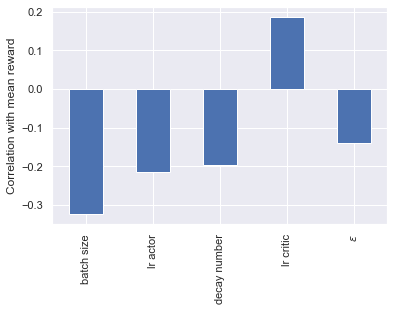

In [65]:
fig, ax = plt.subplots()
corrs = a2c.corr().mean_reward
corrs.index = feature_names + ["mean rewards"]
corrs = corrs.sort_values(axis=0, ascending=False, key=lambda x: abs(x))[1:]
corrs.plot.bar(ax=ax)
ax.set_ylabel("Correlation with mean reward")
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep a2c corr2.png"), bbox_inches="tight", dpi=300)

# Big plots

In [25]:
with open(os.path.join(proj_dir, "experiment_data", "default", "duelddqn_data.json"),"r") as f:
          ddqn_data = json.load(f)
with open(os.path.join(proj_dir, "experiment_data", "default","ppo_data.json"),"r") as f:
          ppo_data = json.load(f)
with open(os.path.join(proj_dir, "experiment_data", "default","dqn_data.json"),"r") as f:
          dqn_data = json.load(f)
with open(os.path.join(proj_dir, "experiment_data", "default", "a2c_data.json"),"r") as f:
          a2c_data = json.load(f)

In [26]:
def stack_data(agent_data, key="rewards"):
    all_data = agent_data.copy()
    max_length = max([len(data[key]) for data in all_data])
    array = np.zeros((len(all_data), max_length))
    for i, data in enumerate(all_data):
        data[key].extend([0] * (max_length-len(data[key])) )
        array[i] = data[key]
    return array

def stack_data_min(agent_data, key="rewards"):
    all_data = agent_data.copy()
    min_length = min([len(data[key]) for data in all_data])
    array = np.zeros((len(all_data), min_length))
    for i, data in enumerate(all_data):
        array[i] = data[key][:min_length]
    return array

In [27]:
# with open(os.path.join(proj_dir, "run_summaries","ppo_data.json"),"r") as f:
#           ppo_data = json.load(f)
# with open(os.path.join(proj_dir, "run_summaries","duelddqn_data.json"),"r") as f:
#           ddqn_data = json.load(f)
# with open(os.path.join(proj_dir, "run_summaries","dqn_data.json"),"r") as f:
#           dqn_data = json.load(f)
# with open(os.path.join(proj_dir, "run_summaries", "a2c_data.json"),"r") as f:
#           a2c_data = json.load(f)

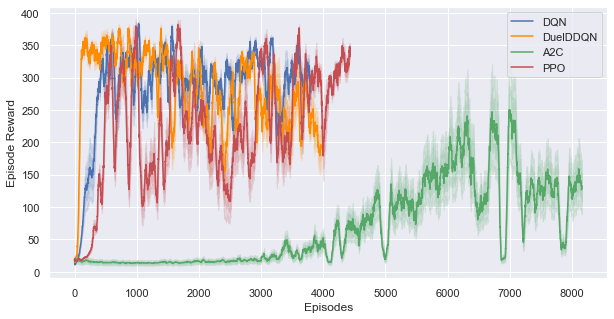

In [28]:
plt.figure(figsize=(10,5))
# dqn
dqn_mean = np.mean(stack_data_min(dqn_data, key="moving_avg_rewards"), axis=0)
dqn_std =  np.std(stack_data_min(dqn_data, key="moving_avg_rewards"), axis=0)
plt.plot(dqn_mean, label="DQN", c="b")
plt.fill_between(np.arange(len(dqn_mean)), dqn_mean - 0.3*dqn_std, dqn_mean+0.3*dqn_std, alpha=0.15, color="b") 
plt.fill_between(np.arange(len(dqn_mean)), dqn_mean - 0.15*dqn_std, dqn_mean+0.15*dqn_std, alpha=0.15, color="b") 


# ddqn
ddqn_mean = np.mean(stack_data_min(ddqn_data, key="moving_avg_rewards"), axis=0)
ddqn_std = np.std(stack_data_min(ddqn_data, key="moving_avg_rewards"), axis=0)
plt.plot(ddqn_mean, label="DuelDDQN", c="darkorange")
plt.fill_between(np.arange(len(ddqn_mean)), ddqn_mean - 0.3*ddqn_std, ddqn_mean+0.3*ddqn_std, alpha=0.15, color="darkorange") 
plt.fill_between(np.arange(len(ddqn_mean)), ddqn_mean - 0.15*ddqn_std, ddqn_mean+0.15*ddqn_std, alpha=0.15, color="darkorange") 

# a2c
a2c_mean = np.mean(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)
a2c_std = np.mean(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)
plt.plot(a2c_mean, label="A2C", c="g")
plt.fill_between(np.arange(len(a2c_mean)), a2c_mean - 0.3*a2c_std, a2c_mean+0.3*a2c_std, alpha=0.15, color="g") 
plt.fill_between(np.arange(len(a2c_mean)), a2c_mean - 0.15*a2c_std, a2c_mean+0.15*a2c_std, alpha=0.15, color="g") 

# ppo
ppo_mean = np.mean(stack_data_min(ppo_data, key="moving_avg_rewards"), axis=0)
ppo_std = np.std(stack_data_min(ppo_data, key="moving_avg_rewards"), axis=0)
plt.plot(ppo_mean, label="PPO", c="r")
plt.fill_between(np.arange(len(ppo_mean)), ppo_mean - 0.3*ppo_std, ppo_mean+0.3*ppo_std, alpha=0.15, color="r") 
plt.fill_between(np.arange(len(ppo_mean)), ppo_mean - 0.15*ppo_std, ppo_mean+0.15*ppo_std, alpha=0.15, color="r") 


plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Episode Reward");
# plt.savefig(os.path.join(proj_dir, "overleaf images", "default plot2.png"), bbox_inches="tight", dpi=200)

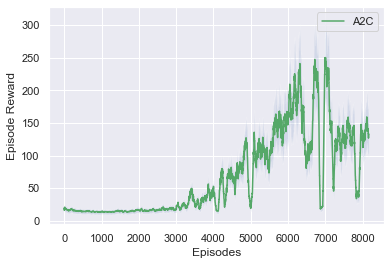

In [29]:
a2c_mean = np.mean(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)
a2c_std = np.mean(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)

plt.plot(a2c_mean, label="A2C", c="g")
plt.fill_between(np.arange(len(a2c_mean)), a2c_mean - 0.25*a2c_std, a2c_mean+0.25*a2c_std, alpha=0.15) 
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Episode Reward");
plt.savefig(os.path.join(proj_dir, "overleaf images", "a2cplot.png"), bbox_inches="tight")